### Create some nice plots fot the thesis

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

import pickle

import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__name__), '../..')))

from src.processing import windsat_datacube, model_preprocess


windsat_path = "../../data/raw/Daily_windsat/"

In [3]:
ds = windsat_datacube(windsat_path)
ds = ds.sel(look_direction = 0)

In [4]:
selection = {
    "day_number" : 1 ,
    "swath_sector" : 0,
    "polarization" : 1,
    "frequency_band" : 1,
}

tbs = ds.tbtoa.sel(**selection)

tbs = ds.surtep_ERA5.sel(day_number = selection["day_number"], swath_sector = selection["swath_sector"])


Text(0.5, 1.0, '01/01/2017')

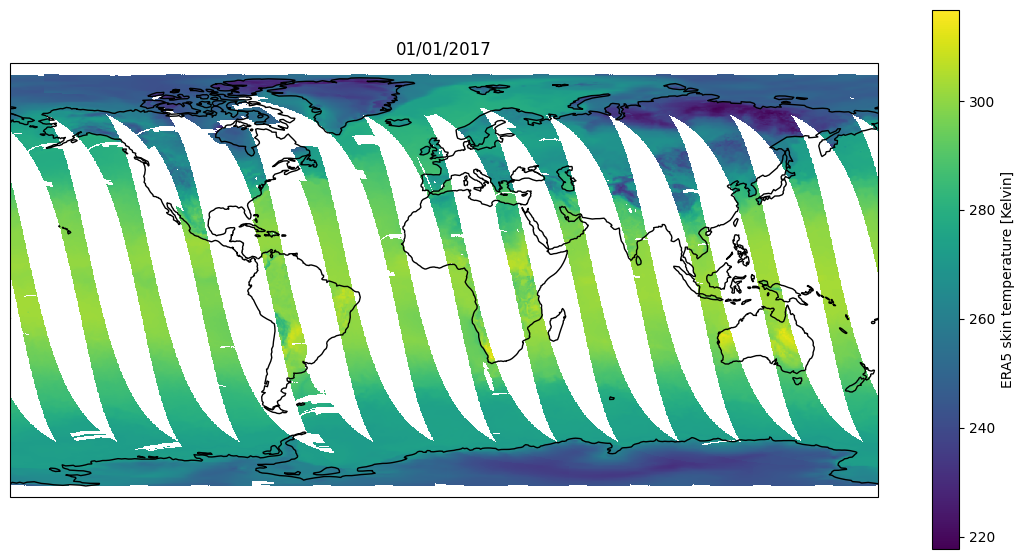

In [5]:
tbswap = tbs.swap_dims(
    {
        "latitude_grid": "lat",
        "longitude_grid": "lon",
    }
)

# Sort the DataArray by latitude and longitude
sorted_tbs = tbswap.sortby(['lat', 'lon'])

fig, ax = plt.subplots(1,1,figsize= (14,7), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=0)})
sorted_tbs.plot(ax = ax)

ax.set_title("")
ax.coastlines("110m")
ax.set_title("01/01/2017")

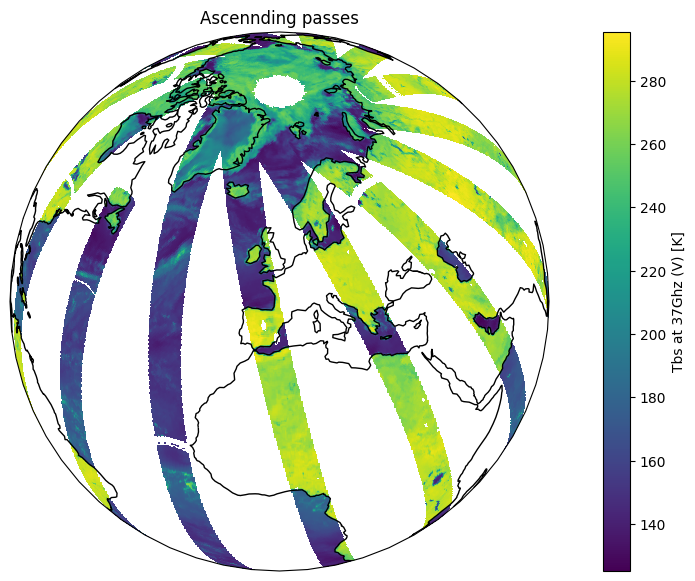

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Extract the data
tbs = ds.tbtoa.sel(day_number=ds.day_number[10], swath_sector=0, polarization=1, frequency_band=1)


tbswap = tbs.swap_dims(
    {
        "latitude_grid": "lat",
        "longitude_grid": "lon",
    }
)

# Sort the DataArray by latitude and longitude
sorted_tbs = tbswap.sortby(['lat', 'lon'])

# Extract data, lat, and lon
data = sorted_tbs.values
lat = sorted_tbs['lat'].values
lon = sorted_tbs['lon'].values

# Create a meshgrid for lat and lon
lon2d, lat2d = np.meshgrid(lon, lat)

# Create the plot with NearsidePerspective projection
fig, ax = plt.subplots(1, 1, figsize=(14, 7), subplot_kw={"projection": ccrs.NearsidePerspective(central_latitude=45, central_longitude=0)})

# Plot the data using pcolormesh
mesh = ax.pcolormesh(lon2d, lat2d, data, transform=ccrs.PlateCarree(), cmap='viridis')

# Add coastlines and colorbar
ax.coastlines("110m")
fig.colorbar(mesh, ax=ax, orientation='vertical', label='Tbs at 37Ghz (V) [K]')

# Set title and show the plot
ax.set_title("Ascennding passes")
plt.show()


In [7]:
def orthographic_preprocess(ds):

    tbswap = ds.swap_dims(
        {
            "latitude_grid": "lat",
            "longitude_grid": "lon",
        }
    )

    # Sort the DataArray by latitude and longitude
    sorted_tbs = tbswap.sortby(['lat', 'lon'])

    return sorted_tbs


def orthographic_plot(ds, central_latitude: float= 0 , central_longitude:float = 0):

    tbs = orthographic_preprocess(ds)

    # Extract data, lat, and lon
    data = tbs.values
    lat = tbs['lat'].values
    lon = tbs['lon'].values

    # Create a meshgrid for lat and lon
    lon2d, lat2d = np.meshgrid(lon, lat)

    # Create the plot with NearsidePerspective projection
    fig, ax = plt.subplots(1, 1, figsize=(28, 14), subplot_kw={"projection": ccrs.NearsidePerspective(central_latitude=central_latitude, central_longitude=central_longitude)})

    # Plot the data using pcolormesh
    mesh = ax.pcolormesh(lon2d, lat2d, data, transform=ccrs.PlateCarree(), cmap='viridis')

    # Add coastlines and colorbar
    ax.coastlines("110m")
    fig.colorbar(mesh, ax=ax, orientation='vertical', label='Tbs at 37Ghz (V) [K]')

    # Set title and show the plot
    # ax.set_title("Ascennding passes")
    plt.show()

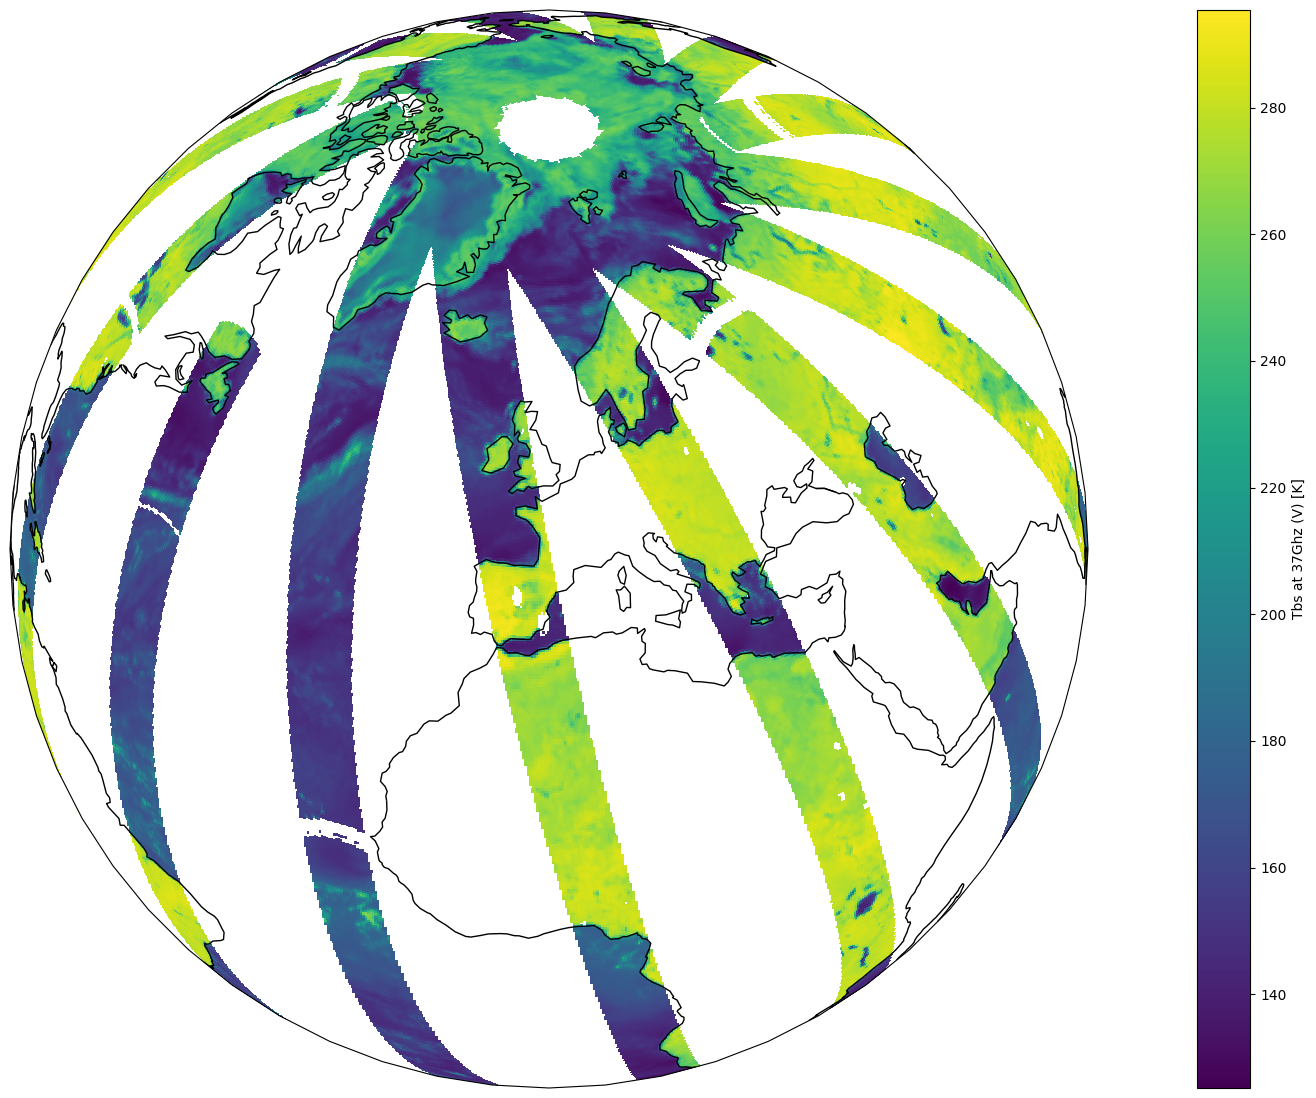

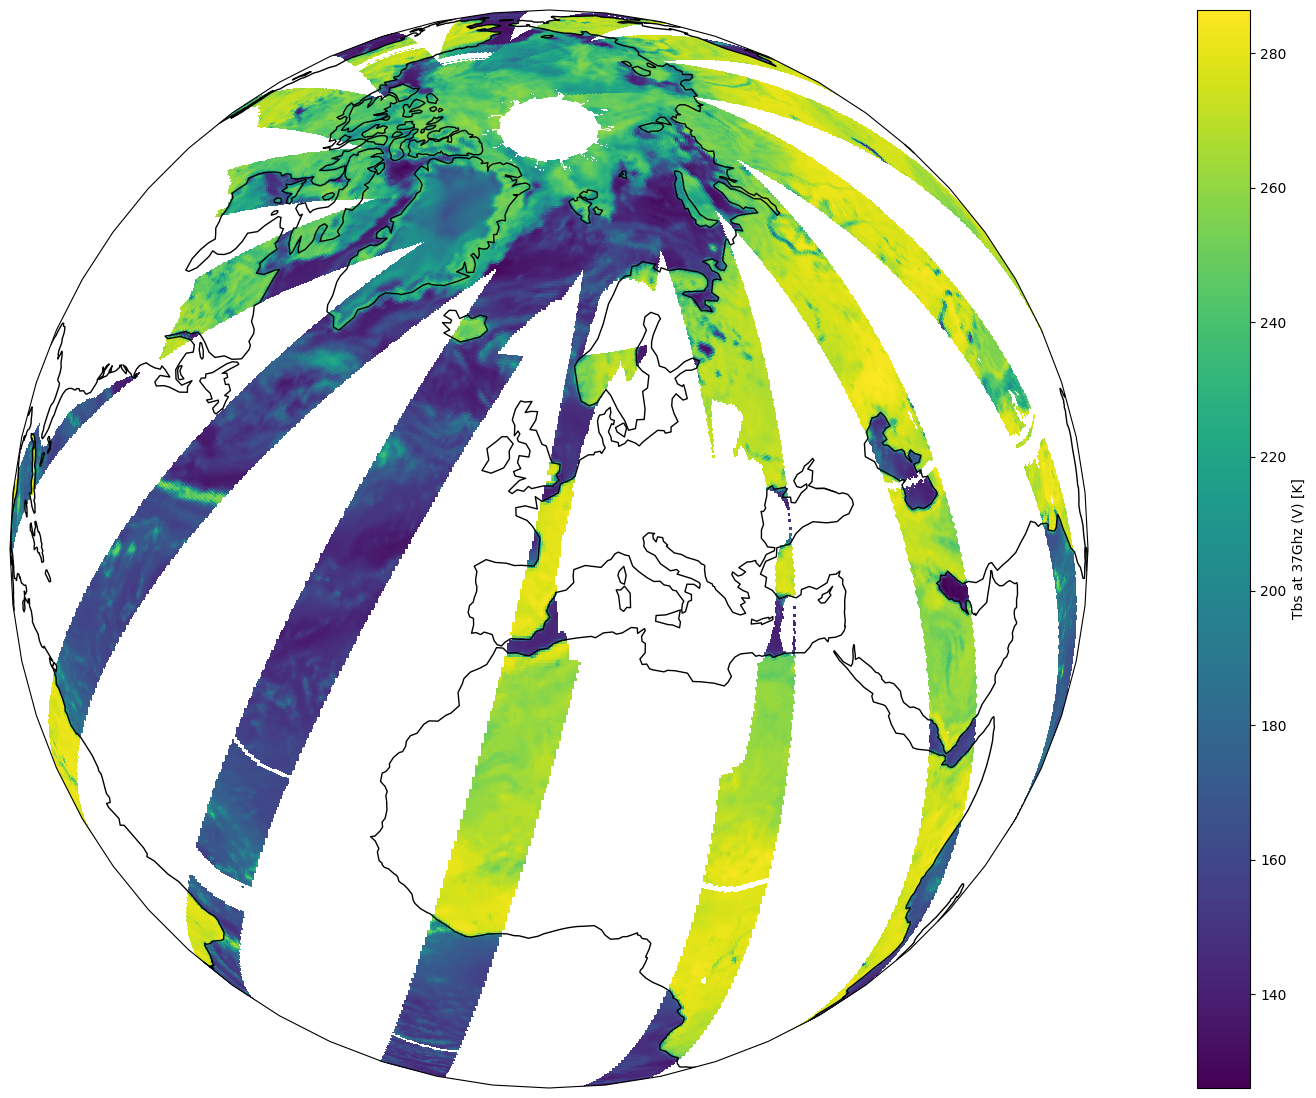

In [10]:
for i in range(2):

    selection = {
        "day_number" : ds.day_number[10] ,
        "swath_sector" : i,
        "polarization" : 1,
        "frequency_band" : 1,
    }

    tbs = ds.tbtoa.sel(**selection)

    orthographic_plot(tbs, central_latitude=45, central_longitude= 0)

### RFI over Continental US


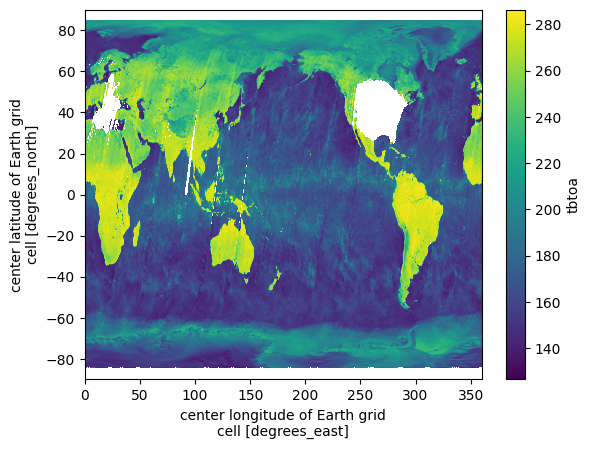

In [62]:
rfi_example = ds.tbtoa.sel(swath_sector = 1, polarization = 1, frequency_band = 1).swap_dims(
    {
        "latitude_grid": "lat",
        "longitude_grid": "lon",
    }
)

# Sort the DataArray by latitude and longitude
sorted_rfi = rfi_example.sortby(['lat', 'lon'])


Text(0.5, 0, 'Tb 37GHz (H) Descending pass')

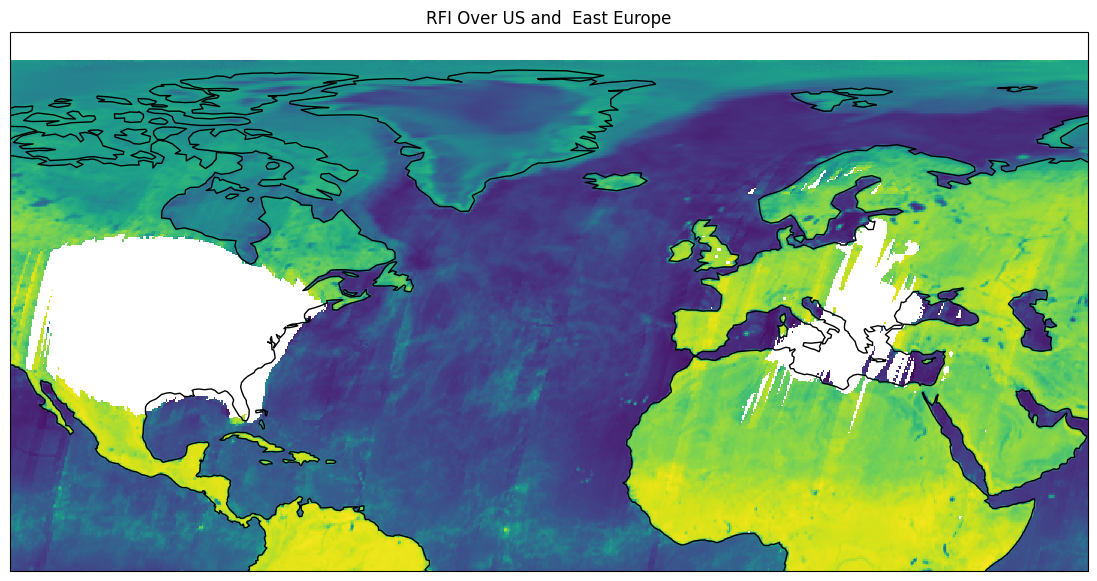

In [79]:

fig, ax = plt.subplots(1,1,figsize= (14,7), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=0)})

ax.set_title("")
ax.coastlines("110m")

sorted_rfi.mean(dim="day_number").plot(ax= ax, add_colorbar = False)

ax.set_ylim([0,90])
ax.set_xlim([-120,60])

ax.set_title("RFI Over US and  East Europe")
ax.set_xlabel("Tb 37GHz (H) Descending pass")

### Keras has some model plotting functions 


In [2]:
os.system("dot -version")

1

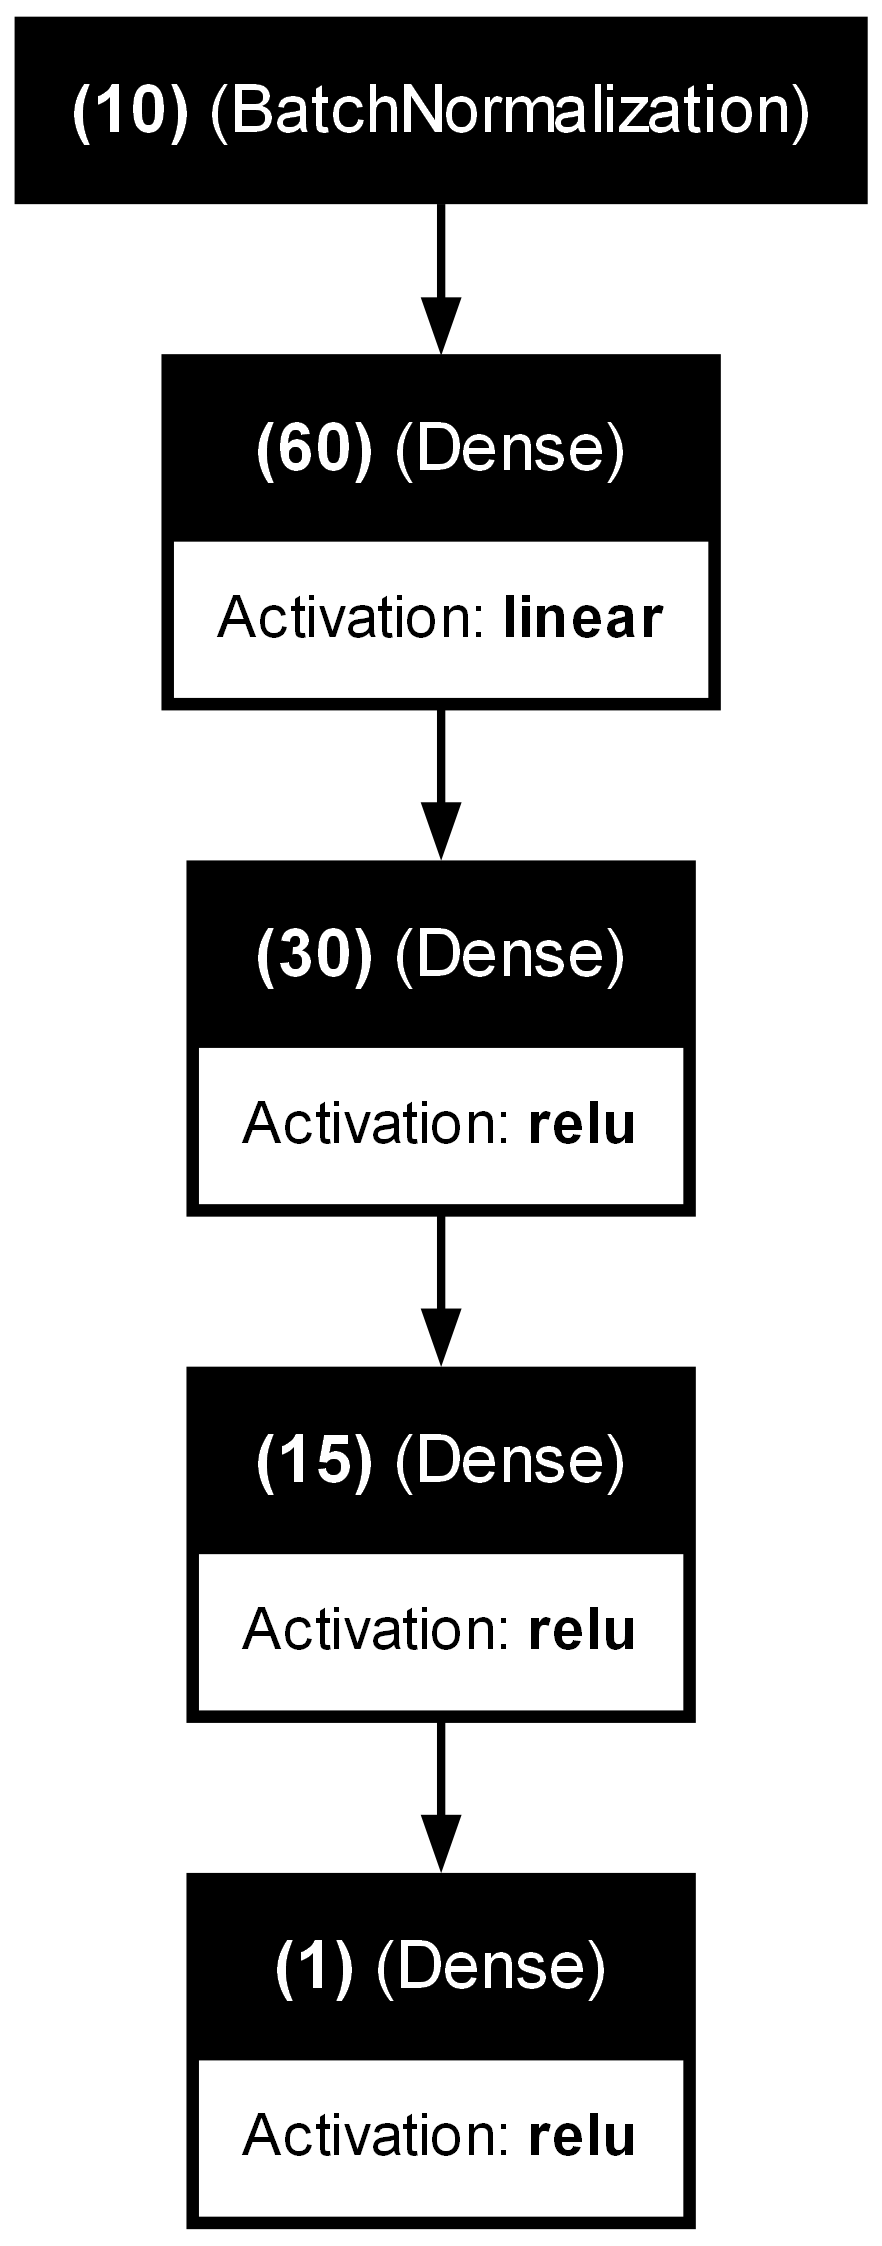

In [66]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

import os

models_path = "../../models/"

datestring = "WSMv2_A_2024_06_28T184738"
model_path = os.path.join(models_path, datestring + ".keras")
history_path = os.path.join(models_path, datestring + "_history")

model = load_model(model_path)
# model.summary()

# Change the name of the layers to display the shape in a compact form:
neurons = [10, 60,30,15,1]
custom_names = [
    f"({n})" for n in neurons
]
for layer, name in zip(model.layers, custom_names):
    layer.name = name


# Save the model into a png file
plot_file = os.path.join(models_path, datestring + "_model_plot.png")
plot_model(model, to_file=plot_file, show_shapes=False, show_layer_names=True, show_layer_activations=True, dpi=300, rankdir="TB")


In [37]:
model.layers[0].name

'batch_normalization ((None, 10))'

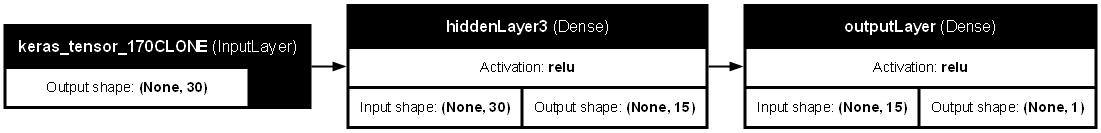

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import os

# Tu modelo cargado previamente
models_path = "../../models/"
datestring = "WSMv2_A_2024_06_28T184738"
model_path = os.path.join(models_path, datestring + ".keras")

model = load_model(model_path)

# Divide el modelo en dos submodelos
# Submodelo 1: desde la capa 0 hasta la capa 2
submodel1 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

# Submodelo 2: desde la salida de la capa 2 hasta la capa final
# Necesitamos recrear la estructura de las capas de la segunda parte
input_layer = model.layers[2].output
hidden_layer3 = model.layers[3](input_layer)
output_layer = model.layers[4](hidden_layer3)

submodel2 = Model(inputs=input_layer, outputs=output_layer)

# Guardar los submodelos en archivos png separados
plot_file1 = os.path.join(models_path, datestring + "_submodel1_plot.png")
plot_model(submodel1, to_file=plot_file1, show_shapes=True, show_layer_names=True, show_layer_activations=True, dpi=72, rankdir='LR')

plot_file2 = os.path.join(models_path, datestring + "_submodel2_plot.png")
plot_model(submodel2, to_file=plot_file2, show_shapes=True, show_layer_names=True, show_layer_activations=True, dpi=72, rankdir='LR')


---
### Training history plot

Plot training history for all models in a single plot.



In [38]:
# Load all the training histories

model_folder = "..\..\models"
model_strings =[
    "WSMv1_A_2024_07_23T135732",
    "WSMv1_D_2024_07_23T120006",
    "WSMv2_A_2024_07_23T202640",
    "WSMv2_D_2024_07_23T180208"
]


model_histories = []

for ms in model_strings:
    history_path = os.path.join(model_folder, ms + "_history")

    with open(history_path, "rb") as file:
        history = pickle.load(file)
        model_histories.append(history)

Text(0.5, 1.0, '')

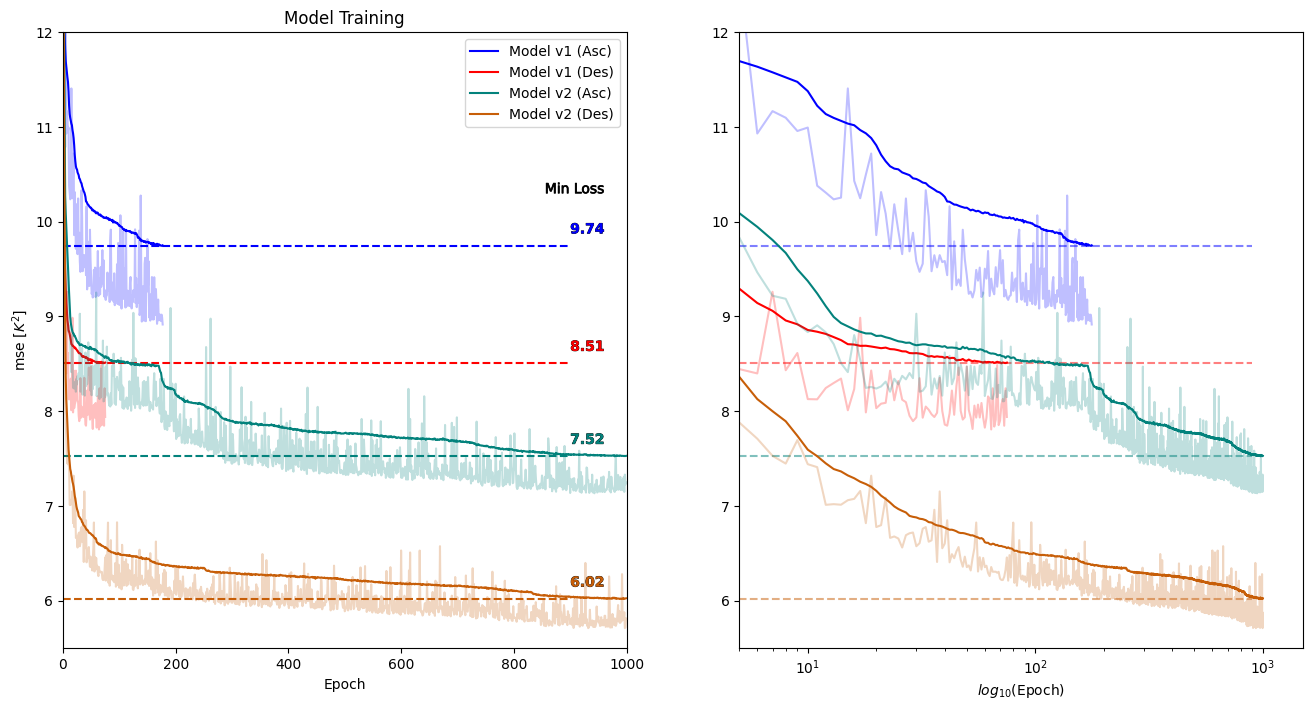

In [41]:

colors = [
    "Blue",
    "Red",
    "#03827c",
    "#c75e08",
]

labels = [
    "Model v1 (Asc)",
    "Model v1 (Des)",
    "Model v2 (Asc)",
    "Model v2 (Des)",
]

training_loss_kw ={
    "alpha" : 1,
}

test_loss_kw ={
    "alpha" : 0.25,
}

xmin, xmax = [0, 900]

fig, axs = plt.subplots(1,2,figsize = (16,8))
ax = axs[0]
for mh, color, label in zip(model_histories, colors, labels):

    # Plot training as filled color
    ax.plot(mh["loss"], c=color, label=label, **training_loss_kw)

    # Plot testing as transparent color
    ax.plot(mh["val_loss"], c=color, label=None, **test_loss_kw)


    # Add a dotted line with the lowest loss 

    min_loss = min(mh["loss"])
    min_val_loss = min(mh["val_loss"])
    
    ax.hlines(y=min_loss, xmin=xmin, xmax=xmax, colors=color, label=None, linestyles="dashed")

    # Print the minimun loss value for each model.
    text_loss = ax.text(xmax, min_loss + 0.1, f"{min_loss:.2f}", color=color, verticalalignment='bottom', fontsize=10, fontweight='bold')
    text_loss.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='black'), path_effects.Normal()])

# Add a label on top of the numbers:
extra_text = ax.text(xmax*0.95, 10.3, "Min Loss")
extra_text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='black'), path_effects.Normal()])


# General plot options
ax.set_xscale("linear")
ax.set_xlim([0,1000])

ax.set_ylim([5.5,12])

ax.set_title("Model Training")
ax.set_ylabel("mse [$K^2$]")
ax.set_xlabel("Epoch")
ax.legend(loc="upper right")

## Second plot in log scale for epoch

ax = axs[1]
for mh, color, label in zip(model_histories, colors, labels):

    # Plot training as filled color
    ax.plot(mh["loss"], c=color, label=label, **training_loss_kw)

    # Plot testing as transparent color
    ax.plot(mh["val_loss"], c=color, label=None, **test_loss_kw)


    # Add a dotted line with the lowest loss 
    xmin, xmax = [0, 900]
    min_loss = min(mh["loss"])
    min_val_loss = min(mh["val_loss"])
    
    ax.hlines(y=min_loss, xmin=xmin, xmax=xmax, colors=color, label=None, linestyles="dashed", alpha = 0.5)


# General plot options

ax.set_xscale("log") # This is interesting but its also a mess
ax.set_xlabel("$log_{10}$(Epoch)")
ax.set_xlim([5,1500])
ax.set_ylim([5.5,12])

ax.set_title("")


## Split training in versions

get the training history in two separated graphs, with the same y scale for comparison

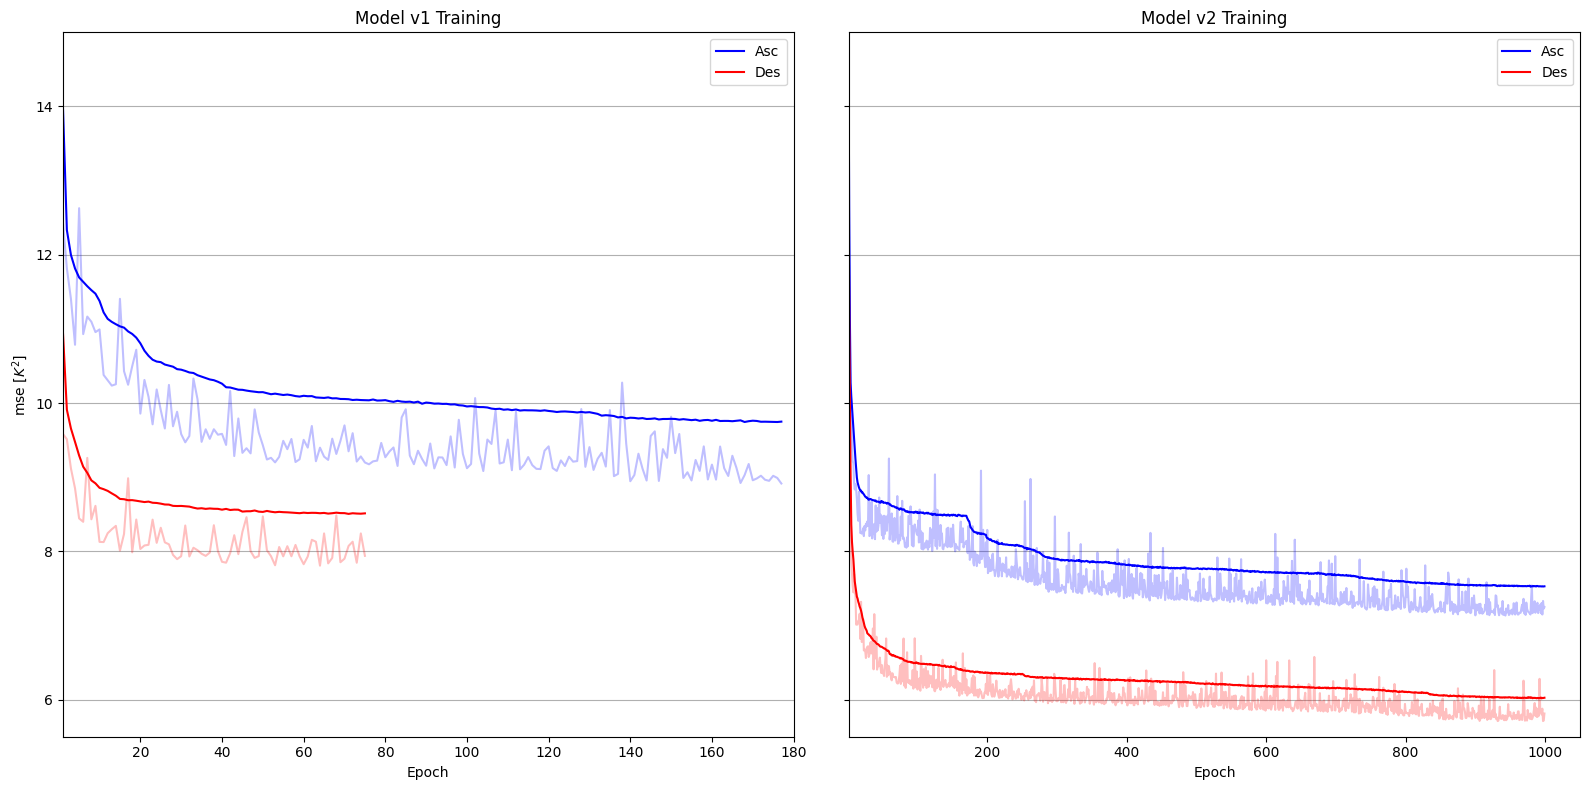

In [3]:

colors = [
    "Blue",
    "Red",
]

labels = [
    "Asc",
    "Des"
]

training_loss_kw ={
    "alpha" : 1,
}

test_loss_kw ={
    "alpha" : 0.25,
}

fig, axs = plt.subplots(1,2,figsize = (16,8))

# Plot model v1 hisroties
ax = axs[0]
to_plot = model_histories[:2]

for mh, color, label in zip(to_plot, colors, labels):

    # Plot training as filled color
    ax.plot(mh["loss"], c=color, label=label, **training_loss_kw)

    # Plot testing as transparent color
    ax.plot(mh["val_loss"], c=color, label=None, **test_loss_kw)


# Axis options
ax.set_title("Model v1 Training")
ax.set_ylim([5.5,15])
ax.set_xlim([1,180])
ax.set_ylabel("mse [$K^2$]")
ax.set_xlabel("Epoch")
ax.legend(loc="upper right")
ax.grid(axis = "y")


# Plot model v2 hisroties
ax = axs[1]
to_plot = model_histories[-2:]

for mh, color, label in zip(to_plot, colors, labels):

    # Plot training as filled color
    ax.plot(mh["loss"], c=color, label=label, **training_loss_kw)

    # Plot testing as transparent color
    ax.plot(mh["val_loss"], c=color, label=None, **test_loss_kw)


# General plot options
ax.set_title("Model v2 Training")
ax.set_xlim([2,1050])
ax.set_ylim([5.5,15])
ax.legend(loc="upper right")
ax.set_xlabel("Epoch")

# Remove yticks, add grid
ax.grid(axis = "y")

plt.tight_layout()
plt.tick_params(labelleft = False)


# PIXEL COUNT

Get the number of measurements per pixel in the validation dataset

In [38]:
ds = windsat_datacube(windsat_path)

# Separate ascending and descending swath
asc_ds = model_preprocess(ds, swath_sector=0, look="impute",add_look_flag=False)
des_ds = model_preprocess(ds, swath_sector=1, look="impute",add_look_flag=False)

def reorder_coordinates(ds):

    ds = ds.roll({
        "longitude_grid" : 180 * 4
    })

    ds = ds.swap_dims({
        "latitude_grid": "lat",
        "longitude_grid": "lon"
    })

    ds["lat"] = ds.lat.sortby("lat")
    ds["lon"] = ds.lon.sortby("lon")

    return ds

asc_ds = reorder_coordinates(asc_ds)
des_ds = reorder_coordinates(des_ds)

C:\Users\andre\AppData\Local\Temp\ipykernel_16900\1900320224.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to include colorbar


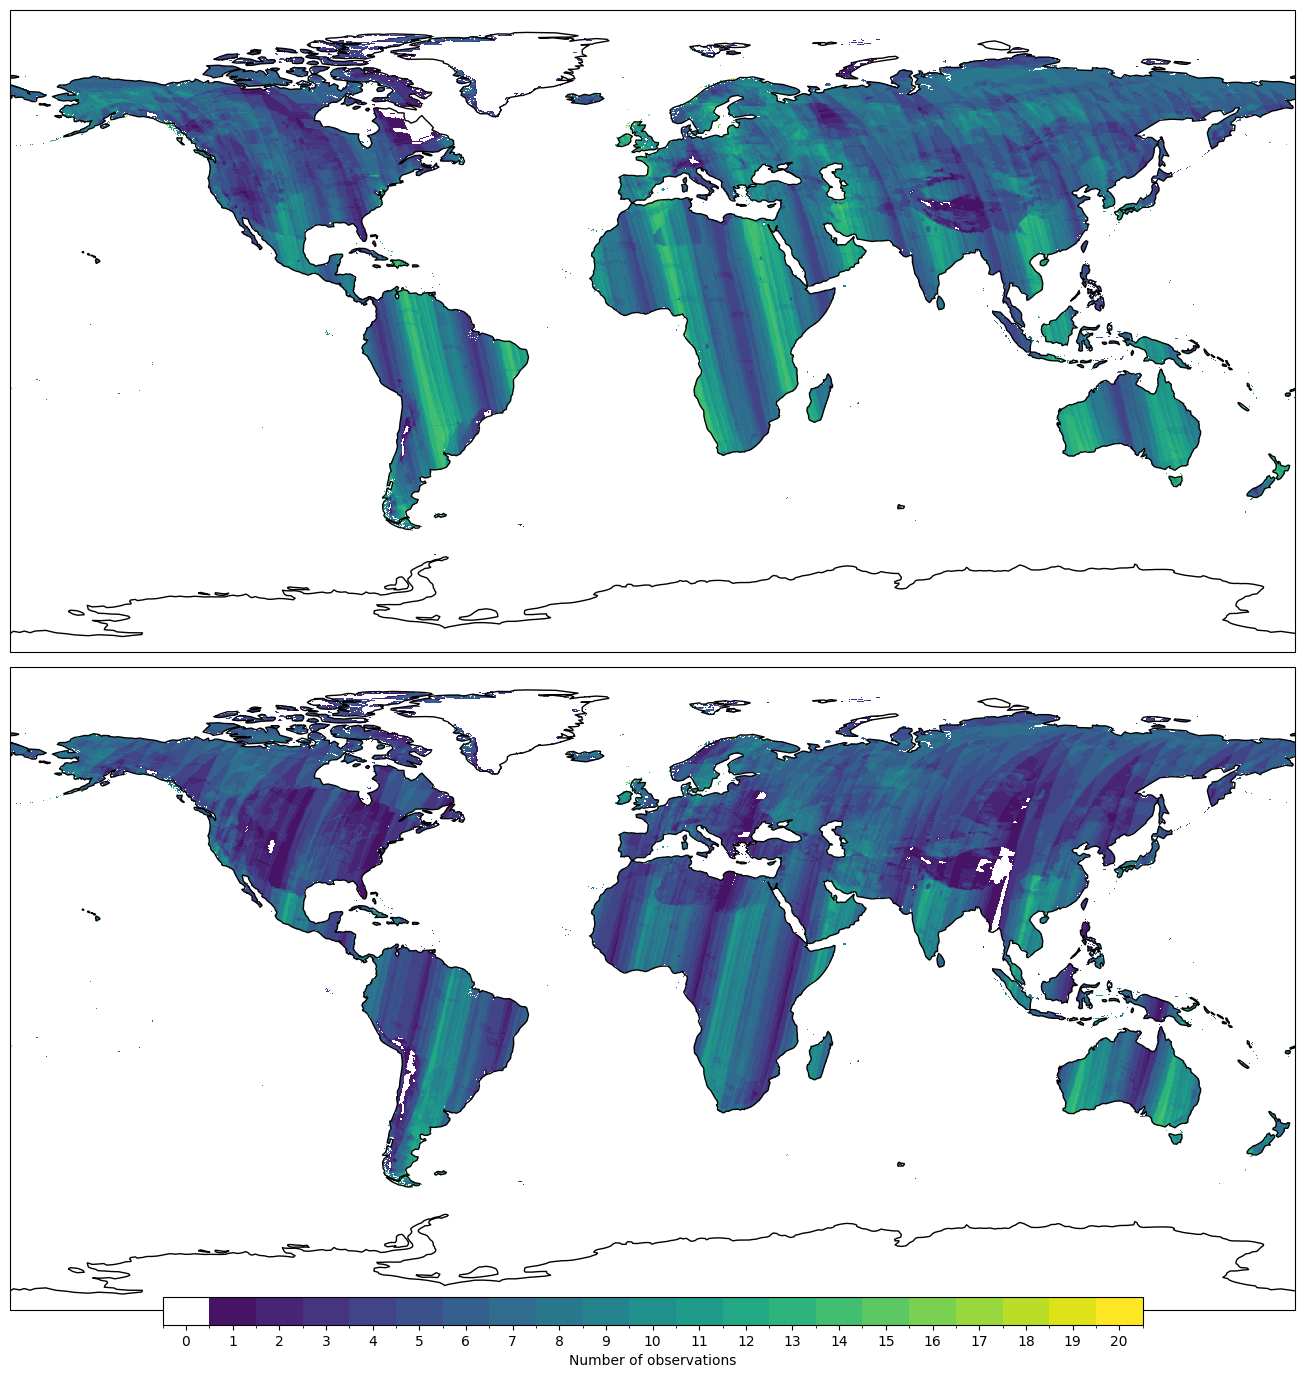

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs

# Create a custom colormap
cmap = plt.cm.viridis  # Use a base colormap
cmap = cmap(np.arange(cmap.N))
# Set the color for the zero values to white
cmap[0, :] = [1, 1, 1, 1]  # [R, G, B, Alpha]
cmap = mcolors.ListedColormap(cmap)

# Normalize the data to handle the range correctly
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, np.max(ds.tbtoa_18Ghz_H.count("day_number").values) + 1.5), ncolors=cmap.N)

fig, axs = plt.subplots(2, 1, figsize=(14, 14), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=0)})

# Plot the data
for i, ds in enumerate([asc_ds, des_ds]):
    ax = axs[i]
    ax.set_title("")
    ax.coastlines("110m")
    plot = ds.tbtoa_18Ghz_H.count("day_number").plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=False)

# Add global colorbar
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Position of colorbar: [left, bottom, width, height]
cbar = fig.colorbar(plot, cax=cbar_ax, orientation='horizontal')

# Set the ticks and labels to integers only
ticks = np.arange(0, 21, 1)  # Integer ticks from 0 to 20
cbar.set_ticks(ticks)
cbar.set_ticklabels(ticks)
cbar.set_label("Number of observations")

fig.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to include colorbar
plt.show()



## IGBP filtered mosaicplot

A mosaicplot showing the proportion of pixels for each class, separated in two columns for ascending and descending passes

In [1]:
#
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

import sys
import os

sys.path.append("../..")

from matplotlib.colors import CenteredNorm
from sklearn.metrics import mean_squared_error
from scipy.stats import kstest

from src.processing import windsat_datacube, model_preprocess
# Files
igbpMajority_path = "../../data/processed/regridded.h5"
igbpPercentaje_path = "../../data/processed/reprojected_igbp_percent_wsgrid.h5"

In [2]:
# Load both datasets 
igbp_ds = xr.open_dataset(igbpMajority_path)
igbp_p = xr.open_dataset(igbpPercentaje_path)

# Add the percentaje array and close its file
igbp_ds["IGBP_percent"] = igbp_p.Land_Cover_Type_1_Percent
igbp_p.close()

# Central longitude is 180 deg on a 1/4 deg. grid
igbp_ds = igbp_ds.roll({
    "x" : 180 * 4
})

In [3]:
# Select the layers
igbp = igbp_ds["IGBP"]
igbp_percent = igbp_ds["IGBP_percent"]

# create the new layer with nan values
valid_pixels = np.full(igbp_ds.IGBP.shape,np.nan)

# Threshold is 70% of the pixel
threshold = 70

# Create a mask for each class, set the value of the array to the class
for i in range(igbp_percent.shape[0]):
    mask = igbp_percent[i,:,:] > threshold
    valid_pixels[mask] = i

    
# Cast the array into a new dataArray
valid_pixels_darr = xr.DataArray(valid_pixels, dims=['y', 'x'], coords={'y': igbp_ds.y, 'x': igbp_ds.x}, name='IGBP_threshold')

# Add it to the original Dataset
igbp_ds["IGBP_threshold"] = valid_pixels_darr


In [48]:
# custom Cmap 
custon_cmap = {
    'water': '#0000AA',
    'evergreen needleleaf forest': '#006400',
    'evergreen broadleaf forest': '#228B22',
    'deciduous needleleaf forest': '#32CD32',
    'deciduous broadleaf forest': '#7CFC00',
    'mixed forests': '#8FBC8F',
    'closed shrubland': '#8B4513',
    'open shrublands': '#DEB887',
    'woody savannas': '#D2691E',
    'savannas': '#FFA500',
    'grasslands': '#7FAA00',
    'permanent wetlands': '#00FFFF',
    'croplands': '#FFD700',
    'urban and built-up': '#A9A9A9',
    'cropland/natural vegetation mosaic': '#808000',
    'snow and ice': '#AAAAFF',
    'barren or sparsely vegetated': '#f5f54c', # changed, too close to white (nans)
}
cmap = mcolors.ListedColormap(list(custon_cmap.values()), name='land_cover')

fig, ax = plt.subplots(1,1,figsize = (16,9), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=0)})
ax.coastlines("110m")

# Create a normalization object
norm = mcolors.BoundaryNorm(np.arange(len(custon_cmap) + 1) - 0.5, len(custon_cmap))

# Create colorbar with custom ticks and labels
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', pad=0.05)
cbar.set_ticks(np.arange(len(custon_cmap)))
cbar.set_ticklabels(list(custon_cmap.keys()))

# Plot the map
igbp_ds.IGBP_threshold.plot(ax = ax, add_colorbar=False, cmap = cmap)

# Show the plot
plt.show()

NameError: name 'mcolors' is not defined

In [5]:

# iterate over the classes:
class_count ={i:0 for i in igbp_ds["Num_IGBP_Classes:MOD12C1"].values }
for i in class_count.keys():

    num_pixels = igbp_ds.IGBP_threshold.where(igbp_ds.IGBP_threshold == i).count(dim=["x","y"])
    class_count[i] = int(num_pixels.values)


# Translate id to class name:
name2id = {
 'water': 0,
 'evergreen needleleaf forest': 1,
 'evergreen broadleaf forest': 2,
 'deciduous needleleaf forest': 3,
 'deciduous broadleaf forest': 4,
 'mixed forests': 5,
 'closed shrubland': 6,
 'open shrublands': 7,
 'woody savannas': 8,
 'savannas': 9,
 'grasslands': 10,
 'permanent wetlands': 11,
 'croplands': 12,
 'urban and built-up': 13,
 'cropland/natural vegetation mosaic': 14,
 'snow and ice': 15,
 'barren or sparsely vegetated': 16,
 }
id2name = {v:k for k,v in name2id.items()}

# Create a dataframe to show results
dataframe_dict = {k:v for k,v in zip(name2id.keys(),class_count.values())}

df = pd.DataFrame.from_dict(dataframe_dict, orient="index").reset_index()
df.columns = ["IGBP_class",f"Valid_pixel_count: {threshold}%"]
df

IGBP_class  Valid_pixel_count: 70%
0                                water                  688697
1          evergreen needleleaf forest                    3361
2           evergreen broadleaf forest                   14119
3          deciduous needleleaf forest                    2569
4           deciduous broadleaf forest                     847
5                        mixed forests                    9830
6                     closed shrubland                       4
7                      open shrublands                   33334
8                       woody savannas                    7081
9                             savannas                    7835
10                          grasslands                   22403
11                  permanent wetlands                     359
12                           croplands                   11788
13                  urban and built-up                      39
14  cropland/natural vegetation mosaic                    2281
15                        snow and ice                  108368
16        barren or sparsely vegetated                   25405

In [6]:

selected_classes = [
    # 'water',
    'evergreen needleleaf forest',
    'evergreen broadleaf forest',
    'deciduous needleleaf forest',
    'deciduous broadleaf forest',
    'mixed forests',
    'closed shrubland',
    'open shrublands',
    'woody savannas',
    'savannas',
    'grasslands',
    # 'permanent wetlands',
    'croplands',
    # 'urban and built-up',
    'cropland/natural vegetation mosaic',
    # 'snow and ice',
    'barren or sparsely vegetated',
]

# Filter out classes with very low pixel count
count_threshold = 100
selected_classes = [c for c in selected_classes if class_count[name2id[c]] > count_threshold]
selected_classes

['evergreen needleleaf forest',
 'evergreen broadleaf forest',
 'deciduous needleleaf forest',
 'deciduous broadleaf forest',
 'mixed forests',
 'open shrublands',
 'woody savannas',
 'savannas',
 'grasslands',
 'croplands',
 'cropland/natural vegetation mosaic',
 'barren or sparsely vegetated']

<xarray.Dataset> Size: 904MB
Dimensions:         (day_number: 24, latitude_grid: 720, longitude_grid: 1440)
Coordinates:
  * day_number      (day_number) int32 96B 1 2 57 58 84 ... 283 323 324 348 349
  * latitude_grid   (latitude_grid) int32 3kB 0 1 2 3 4 ... 715 716 717 718 719
  * longitude_grid  (longitude_grid) int32 6kB 0 1 2 3 4 ... 1436 1437 1438 1439
Data variables:
    surtep_ERA5     (day_number, latitude_grid, longitude_grid) float32 100MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    lat             (latitude_grid) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
    lon             (longitude_grid) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    tbtoa_18Ghz_V   (day_number, latitude_grid, longitude_grid) float64 199MB dask.array<chunksize=(1, 240, 480), meta=np.ndarray>
    tbtoa_18Ghz_H   (day_number, latitude_grid, longitude_grid) float64 199MB dask.array<chunksize=(1, 240, 480), meta=np.ndarray>
    tbtoa_37Ghz_V   (day_number, latitude_grid, longitude_grid) float64 199MB dask.array<chunksize=(1, 240, 480), meta=np.ndarray>
    tbtoa_37Ghz_H   (day_number, latitude_grid, longitude_grid) float64 199MB dask.array<chunksize=(1, 240, 480), meta=np.ndarray>
    IGBP_threshold  (latitude_grid, longitude_grid) float64 8MB 12.0 ... 0.0
Attributes: (12/72)
    Conventions:                            CF-1.7
    title:                                  RSS WindSat TOA Brightness Temper...
    version:                                V01.0
    summary:                                The dataset contains RSS WindSat ...
    references:                              [1] T. Meissner et al., Remote S...
    acknowledgement:                        Funded under NASA Grant 80NSSC21K...
    ...                                     ...
    Source_of_ancillary_IMERG_rain_rate:    Huffman, G. et al.,  2019. NASA G...
    Source_of_ancillary_CCMP_wind:          Mears, C. et al., 2023.Remote Sen...
    Source_of_ancillary_ERA5:               ECMWF Reanalysis v5 (ERA5). https...
    Source_of_RSS_WindSat_AS_ECV:           https://www.remss.com/missions/wi...
    Source_of_ancillary_HYCOM_SSS:          Hybrid Coordinate Ocean Model, Gl...
    Source_of_WindSat_L1C_TB:               T. Meissner et al., Remote Sensin...

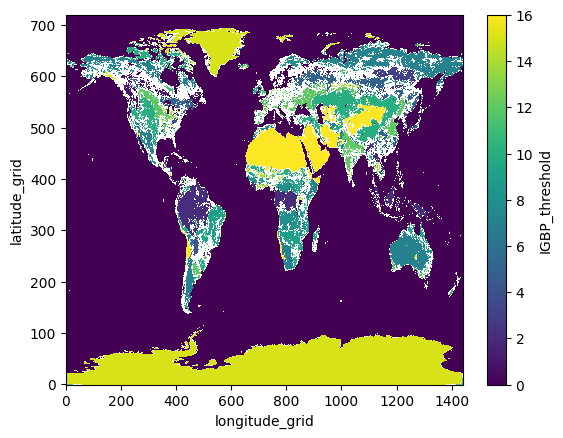

In [7]:
# Load windsat dataset and count all valid pixels for a swath:

import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__name__), '../..')))

from src.processing import windsat_datacube, model_preprocess


windsat_path = "../../data/raw/Daily_windsat/"

swath = 0 

ws_sd = windsat_datacube(windsat_path)

# Add the selected pixels:
igbp_ds = igbp_ds.roll({
    "x" : 180 * 4
})

swath_ds = model_preprocess(ws_sd, swath_sector=swath, look="impute", add_look_flag=False)

swath_ds["IGBP_threshold"] = (("latitude_grid","longitude_grid"), igbp_ds.IGBP_threshold.values)
swath_ds.IGBP_threshold.plot()
swath_ds


In [13]:
# Count how many pixels for each class have data:
counts = {
    i: 0  for i in range(20)
}
for clasid, _  in counts.items():
    counts[clasid] = swath_ds.tbtoa_37Ghz_V.where(swath_ds.IGBP_threshold == clasid).count().values

counts

{0: array(9163),
 1: array(18208),
 2: array(113929),
 3: array(18577),
 4: array(8494),
 5: array(64034),
 6: array(37),
 7: array(236767),
 8: array(54489),
 9: array(63912),
 10: array(135554),
 11: array(2113),
 12: array(88925),
 13: array(229),
 14: array(16597),
 15: array(8451),
 16: array(200090),
 17: array(0),
 18: array(0),
 19: array(0)}

In [22]:
named_counts = {id2name[k]: int(v) for k,v in counts.items() if k <17}
conunts_df  = pd.DataFrame.from_dict(named_counts, orient="index", columns= [f"{swath} swath"])
conunts_df

0 swath
water                                  9163
evergreen needleleaf forest           18208
evergreen broadleaf forest           113929
deciduous needleleaf forest           18577
deciduous broadleaf forest             8494
mixed forests                         64034
closed shrubland                         37
open shrublands                      236767
woody savannas                        54489
savannas                              63912
grasslands                           135554
permanent wetlands                     2113
croplands                             88925
urban and built-up                      229
cropland/natural vegetation mosaic    16597
snow and ice                           8451
barren or sparsely vegetated         200090

In [41]:
# for both swaths:
swath2name = {
    0 : "Asc",
    1 : "Des"
}

swath_counts = []
for swathid, swathname in swath2name.items():

    swath_ds = model_preprocess(ws_sd, swath_sector=swath, look="impute", add_look_flag=False)
    swath_ds["IGBP_threshold"] = (("latitude_grid","longitude_grid"), igbp_ds.IGBP_threshold.values)

    # Count how many pixels for each class have data:
    counts = {
        i: 0  for i in range(20)
    }
    for clasid, _  in counts.items():
        counts[clasid] = swath_ds.tbtoa_37Ghz_V.where(swath_ds.IGBP_threshold == clasid).count().values

    named_counts = {id2name[k]: int(v) for k,v in counts.items() if k <17}
    counts_df  = pd.DataFrame.from_dict(named_counts, orient="index", columns= [f"{swathname} swath"])
    swath_counts.append(counts_df)


In [42]:
swath_counts[0]["Des swath"] = swath_counts[1]
df = swath_counts[0]
df

Asc swath  Des swath
water                                    9163       9163
evergreen needleleaf forest             18208      18208
evergreen broadleaf forest             113929     113929
deciduous needleleaf forest             18577      18577
deciduous broadleaf forest               8494       8494
mixed forests                           64034      64034
closed shrubland                           37         37
open shrublands                        236767     236767
woody savannas                          54489      54489
savannas                                63912      63912
grasslands                             135554     135554
permanent wetlands                       2113       2113
croplands                               88925      88925
urban and built-up                        229        229
cropland/natural vegetation mosaic      16597      16597
snow and ice                             8451       8451
barren or sparsely vegetated           200090     200090

In [8]:
# Explicit definition of data is faster. This dataframes were imported from IGBP validation notebooks
import pandas as pd

data = {
    "class_name": [
        "All Classes",
        "barren or sparsely vegetated",
        "cropland/natural vegetation mosaic",
        "croplands",
        "deciduous broadleaf forest",
        "deciduous needleleaf forest",
        "evergreen broadleaf forest",
        "evergreen needleleaf forest",
        "grasslands",
        "mixed forests",
        "open shrublands",
        "savannas",
        "woody savannas"
    ],
    "Count": [
        289557,
        18501,
        3008,
        27230,
        4083,
        1961,
        21232,
        17363,
        59460,
        23902,
        89227,
        11214,
        12376
    ]
}

df_Des = pd.DataFrame(data)

data = {
    "class_name": [
        "All Classes",
        "barren or sparsely vegetated",
        "cropland/natural vegetation mosaic",
        "croplands",
        "deciduous broadleaf forest",
        "deciduous needleleaf forest",
        "evergreen broadleaf forest",
        "evergreen needleleaf forest",
        "grasslands",
        "mixed forests",
        "open shrublands",
        "savannas",
        "woody savannas"
    ],
    "Count": [
        371717,
        26702,
        4313,
        33126,
        6652,
        557,
        35915,
        19761,
        85532,
        28540,
        102118,
        14928,
        13573
    ]
}

df_Asc = pd.DataFrame(data)




In [24]:
to_plot = df_Des.merge(df_Asc, on="class_name", suffixes=("_Des","_Asc"))
to_plot = to_plot[1:]

to_plot.set_index('class_name', inplace=True)

# Preparar los datos para el mosaico
mosaic_data = {
    ('Descendente', cls): to_plot.loc[cls, 'Count_Des'] for cls in to_plot.index
}
mosaic_data.update({
    ('Ascendente', cls): to_plot.loc[cls, 'Count_Asc'] for cls in to_plot.index
})
mosaic_data

{('Descendente', 'barren or sparsely vegetated'): 18501,
 ('Descendente', 'cropland/natural vegetation mosaic'): 3008,
 ('Descendente', 'croplands'): 27230,
 ('Descendente', 'deciduous broadleaf forest'): 4083,
 ('Descendente', 'deciduous needleleaf forest'): 1961,
 ('Descendente', 'evergreen broadleaf forest'): 21232,
 ('Descendente', 'evergreen needleleaf forest'): 17363,
 ('Descendente', 'grasslands'): 59460,
 ('Descendente', 'mixed forests'): 23902,
 ('Descendente', 'open shrublands'): 89227,
 ('Descendente', 'savannas'): 11214,
 ('Descendente', 'woody savannas'): 12376,
 ('Ascendente', 'barren or sparsely vegetated'): 26702,
 ('Ascendente', 'cropland/natural vegetation mosaic'): 4313,
 ('Ascendente', 'croplands'): 33126,
 ('Ascendente', 'deciduous broadleaf forest'): 6652,
 ('Ascendente', 'deciduous needleleaf forest'): 557,
 ('Ascendente', 'evergreen broadleaf forest'): 35915,
 ('Ascendente', 'evergreen needleleaf forest'): 19761,
 ('Ascendente', 'grasslands'): 85532,
 ('Ascenden

In [72]:
# Explicit definition of the mosaicplot properties:
prop = {
    "('Descendente', 'open shrublands')": {"color": "xkcd:orange"},
    "('Descendente', 'grasslands')": {"facecolor": "#7FAA00"},
    "('Descendente', 'croplands')": {"facecolor": "#FFD700"},
    "('Descendente', 'mixed forests')": {"facecolor": "#8FBC8F"},
    "('Descendente', 'evergreen broadleaf forest')": {"facecolor": "#228B22"},
    "('Descendente', 'barren or sparsely vegetated')": {"facecolor": "#f5f54c"},
    "('Descendente', 'evergreen needleleaf forest')": {"facecolor": "#006400"},
    "('Descendente', 'woody savannas')": {"color": "#D2691E"},
    "('Descendente', 'savannas')": {"color": "#FFA500"},
    "('Descendente', 'deciduous broadleaf forest')": {"color": "#7CFC00"},
    "('Descendente', 'cropland/natural vegetation mosaic')": {"color": "#808000"},
    "('Descendente', 'deciduous needleleaf forest')": {"color": "#32CD32"},
    "('Ascendente', 'open shrublands')": {"color": "#DEB887"},
    "('Ascendente', 'grasslands')": {"color": "#7FAA00"},
    "('Ascendente', 'croplands')": {"color": "#FFD700"},
    "('Ascendente', 'mixed forests')": {"color": "#8FBC8F"},
    "('Ascendente', 'evergreen broadleaf forest')": {"color": "#228B22"},
    "('Ascendente', 'barren or sparsely vegetated')": {"color": "xkcd:orange"},
    "('Ascendente', 'evergreen needleleaf forest')": {"color": "#006400"},
    "('Ascendente', 'woody savannas')": {"color": "#D2691E"},
    "('Ascendente', 'savannas')": {"color": "#FFA500"},
    "('Ascendente', 'deciduous broadleaf forest')": {"color": "#7CFC00"},
    "('Ascendente', 'cropland/natural vegetation mosaic')": {"color": "#808000"},
    "('Ascendente', 'deciduous needleleaf forest')": {"color": "#32CD32"}
}



In [138]:
to_plot

Count_Des  Count_Asc
class_name                                              
barren or sparsely vegetated            18501      26702
cropland/natural vegetation mosaic       3008       4313
croplands                               27230      33126
deciduous broadleaf forest               4083       6652
deciduous needleleaf forest              1961        557
evergreen broadleaf forest              21232      35915
evergreen needleleaf forest             17363      19761
grasslands                              59460      85532
mixed forests                           23902      28540
open shrublands                         89227     102118
savannas                                11214      14928
woody savannas                          12376      13573